In [1]:
import numpy as np
import pandas as pd
import cmath

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift

import warnings
warnings.filterwarnings('ignore')

In [2]:
img = cv.imread('knee_image.png',0)
F = np.fft.fft2(img)

In [3]:
class Blurr():
    def __init__(self,image):
        self.image = image
        self.row = image.shape[0]
        self.col = image.shape[1]

    def get_fourier_transform(self):
        F = np.fft.fft2(self.image)
        return F
    
    def get_inverse_fft(self,fourer):
        img_mod = np.fft.ifft2(fourer)
        return np.abs(img_mod)
        

    def get_blurring_matrix(self,T,a,b):
        H = [ [ 0 for i in range(self.col) ] for j in range(self.row)]
        for i in range(self.row):
            for j in range(self.col):
                p = ((i+1)*a)+((j+1)*b)
                z= 3.14 * p
                if (z==0):
                    magnitude=0
                    phase = 0
                else:
                    sin_z = np.sin((z * np.pi)/180)
                    magnitude =( T/z) * sin_z
                    phase = -z
                    H[i][j]=cmath.rect(magnitude, phase)
        return H

    def get_blurred_image(self, F,H):
        return F*H

    def generate_blurr_constant_a_and_T(self,T=0.5,a=0,b=[0.1,0.5,0.2,0.3,0.4]):
        F = self.get_fourier_transform()
        Gb = [0]* len(b)
        
        for i in range(len(b)):
            H = self.get_blurring_matrix(T,a,b[i])
            Gb[i] = self.get_blurred_image(F,H)
            img_mod = self.get_inverse_fft(Gb[i])
            
            plt.figure(figsize=(16,9))
            plt.subplot(121), plt.imshow(self.image, cmap='gray')
            plt.title('Before transformation'), plt.xticks([]), plt.yticks([])
            
            plt.subplot(122), plt.imshow(img_mod, cmap='gray')
            plt.title('After transformation:Parameters(T= {T}, a= {a},b = {b} )' .format(T=T,a=a,b=b[i])), plt.xticks([]), plt.yticks([])
        
            path =  "images/constant_a_and_T/" + 'image_'+ str(T)+'_'+str(a)+ '_'+str(b[i]) + ".png"
            plt.savefig(path, bbox_inches = 'tight',facecolor='white')
            plt.show()

        return Gb
    
    def generate_blurr_constant_b_and_T(self,T=0.5,a=[0.1,0.15,0.25,0.35],b= 0.1):
        F = self.get_fourier_transform()
        Ga = [0]* len(a)
        
        for i in range(len(a)):
            H = self.get_blurring_matrix(T,a[i],b)
            Ga[i] = self.get_blurred_image(F,H)
            img_mod = self.get_inverse_fft(Ga[i])
            
            plt.figure(figsize=(16,9))
            plt.subplot(121), plt.imshow(self.image, cmap='gray')
            plt.title('Before transformation'), plt.xticks([]), plt.yticks([])
            
            plt.subplot(122), plt.imshow(img_mod, cmap='gray')
            plt.title('After transformation:Parameters(T= {T}, a= {a},b= {b} )' .format(T=T,a=a[i],b=b)), plt.xticks([]), plt.yticks([])
        
            path =  "images/constant_b_and_T/" + 'image_'+ str(T)+'_'+str(a[i])+'_'+ str(b) + ".png"
            plt.savefig(path, bbox_inches = 'tight',facecolor='white')
            plt.show()

        return Ga

    def generate_blurr_combination_a_and_b(self,T=0.5,a=[0.1,0.15,0.25,0.35],b=[0.1,0.2,0.3]):
        F = self.get_fourier_transform()
        Gab = [0]* len(a)* len(b)
        for i in range(len(a)):
            for j in range(len(b)):
                H = self.get_blurring_matrix(T,a[i],b[j])
                Gab[x] = self.get_blurred_image(F,H)
                img_mod = self.get_inverse_fft(Gab[x])

                plt.figure(figsize=(16,9))
                plt.subplot(121), plt.imshow(self.image, cmap='gray')
                plt.title('Before transformation'), plt.xticks([]), plt.yticks([])

                plt.subplot(122), plt.imshow(img_mod, cmap='gray')
                plt.title('After transformation:Parameters(T= {T}, a= {a},b= {b} )' .format(T=T,a=a[i],b=b[j])), plt.xticks([]), plt.yticks([])

                path =  "images/combination_a_and_b/" + 'image_'+ str(T)+'_'+str(a[i])+'_'+str(b[j]) + ".png"
                plt.savefig(path, bbox_inches = 'tight',facecolor='white')
                plt.show()

        return Gab

#     def plot_image(self,G,T,a,b):
#         for i in range(len(G)):
#             img_mod = self.get_inverse_fft(G[i])
            
#             #show differences
#             plt.figure(figsize=(16,9))
#             plt.subplot(121), plt.imshow(self.image, cmap='gray')
#             plt.title('Before transformation'), plt.xticks([]), plt.yticks([])
            
#             plt.subplot(122), plt.imshow(img_mod, cmap='gray')
#             plt.title('After transformation:Parameters(T= {T}, a= {a},b= {b} )' .format(T=T,a=a,b=b)), plt.xticks([]), plt.yticks([])
        
#             path =  "images/" + str(a)+str(b)+ str(T) + ".png"
#             plt.savefig(path, bbox_inches = 'tight',facecolor='white')
#             plt.show()

        
        

In [4]:
blur = Blurr(img)

In [5]:
blur_f = blur.get_fourier_transform()

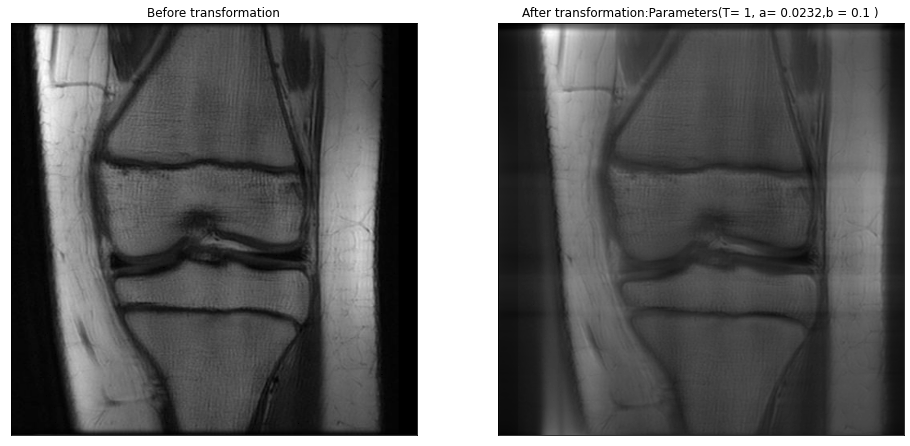

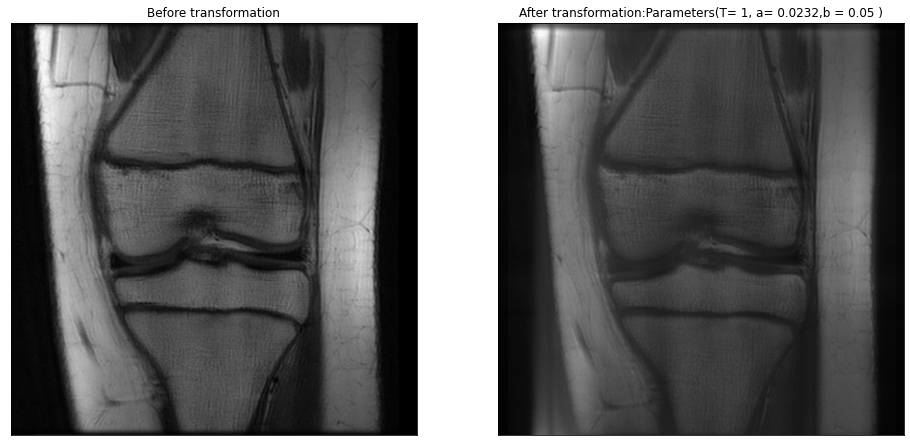

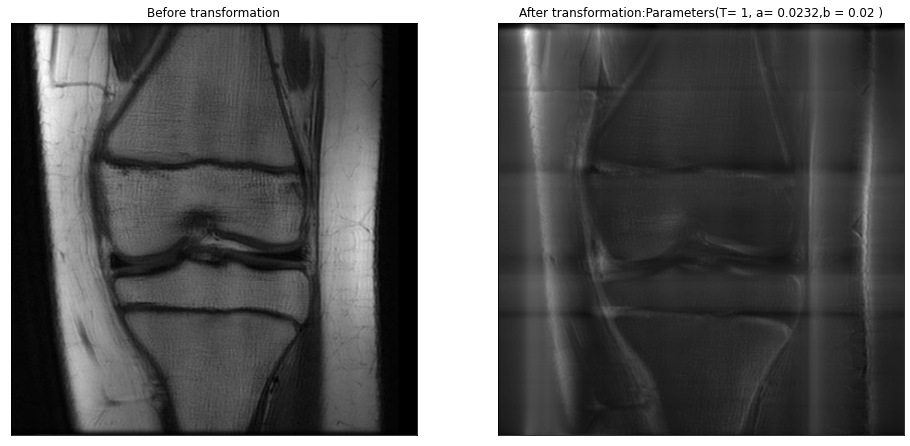

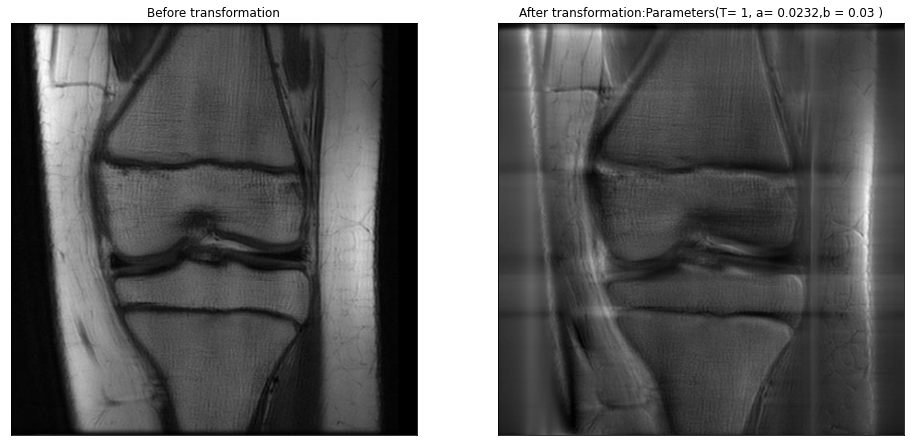

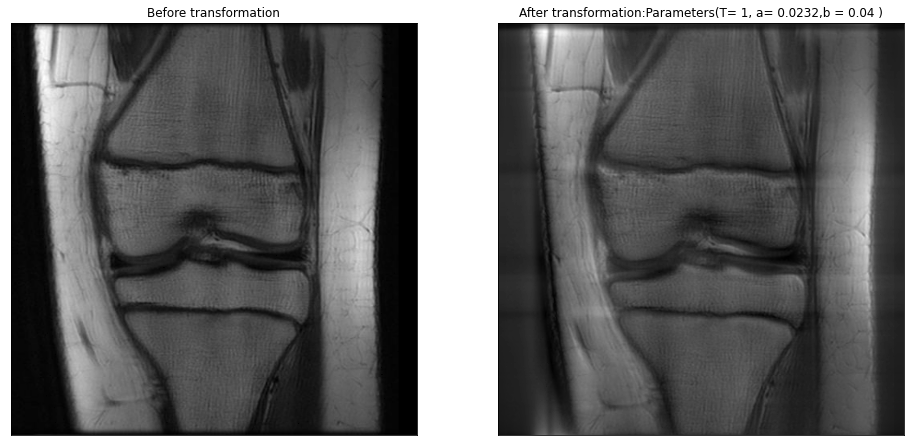

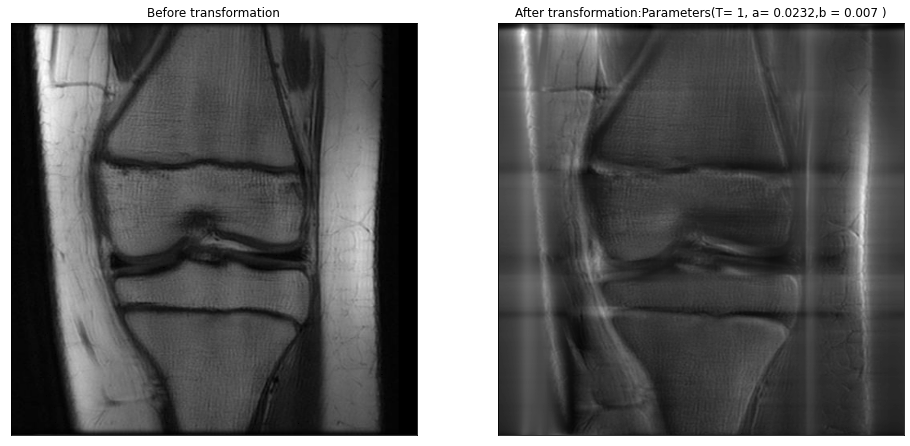

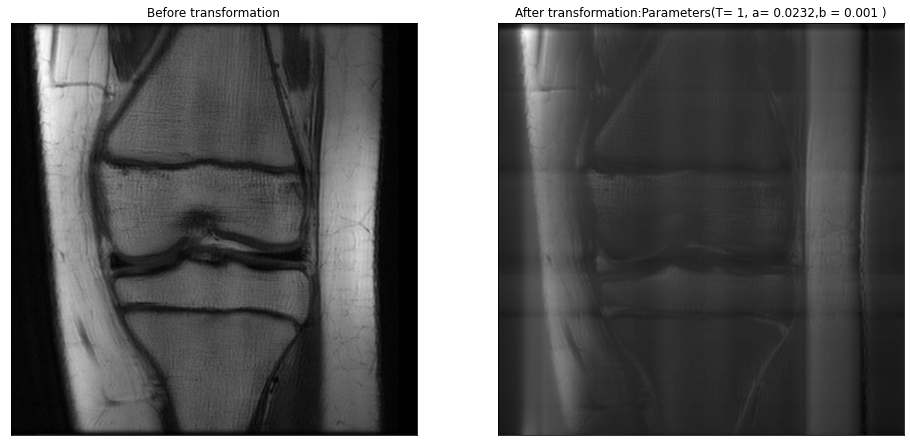

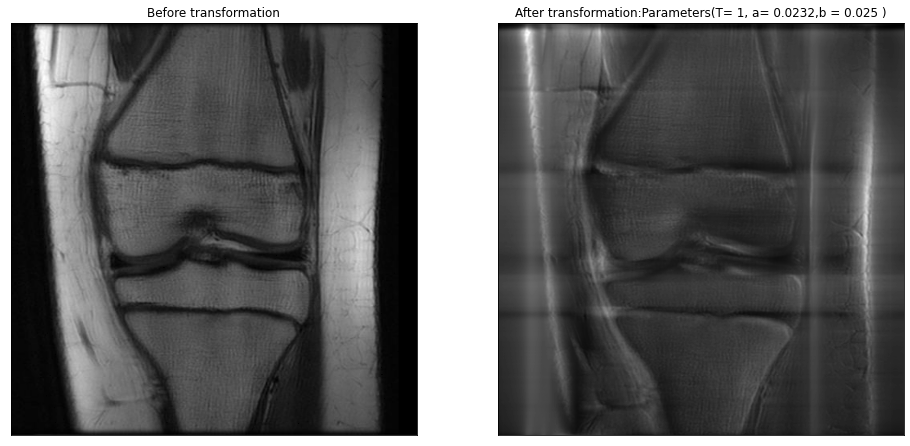

In [6]:
Gb = blur.generate_blurr_constant_a_and_T(T=1,a=0.0232,b=[0.1,0.05,0.02,0.03,0.04,0.007,0.001,0.025])

In [8]:
len(Gb)

8

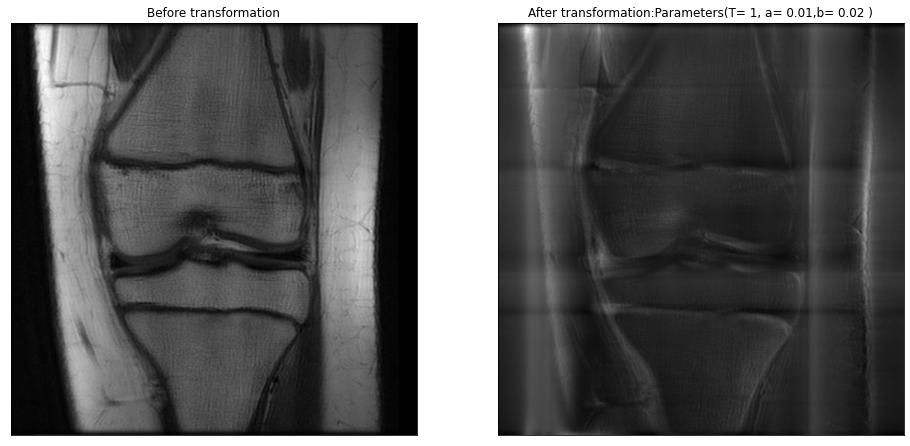

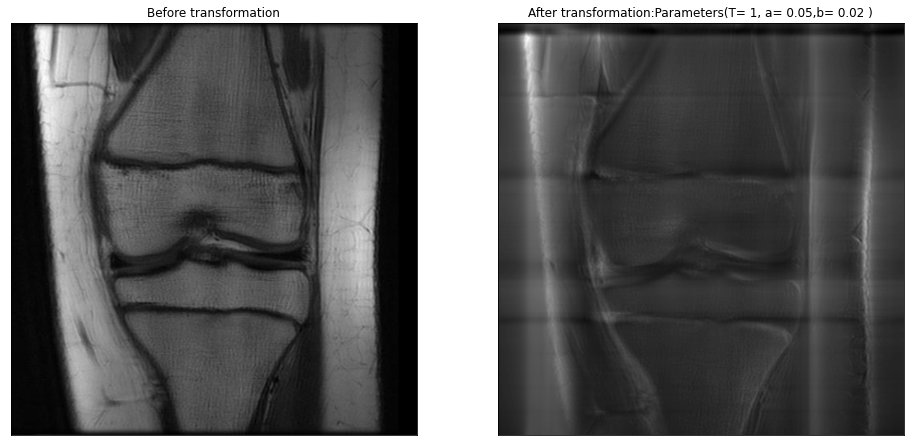

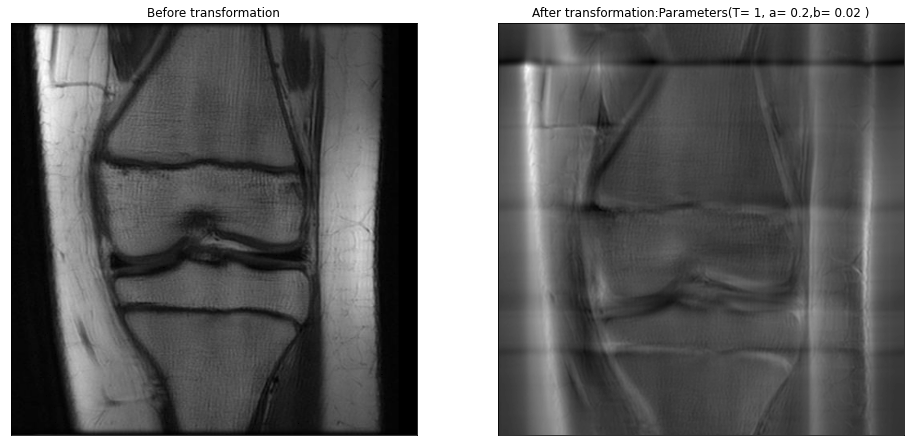

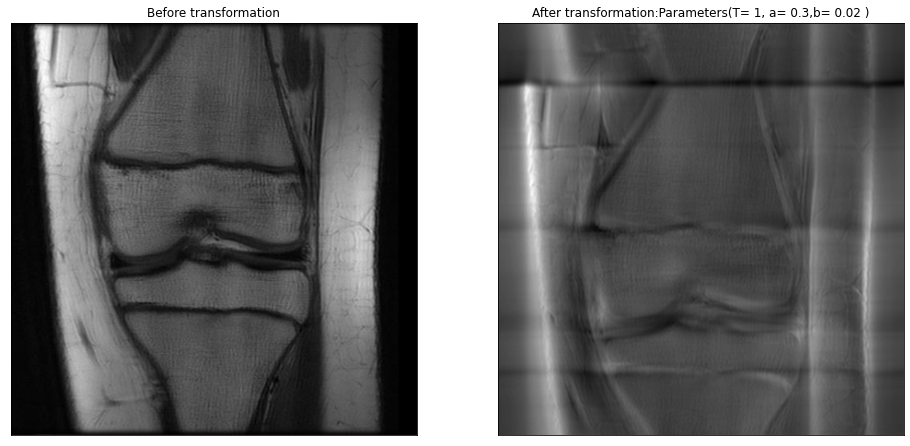

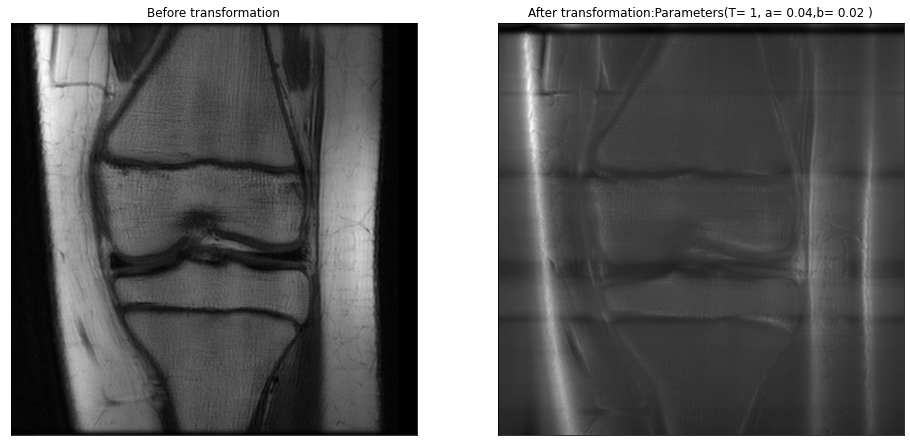

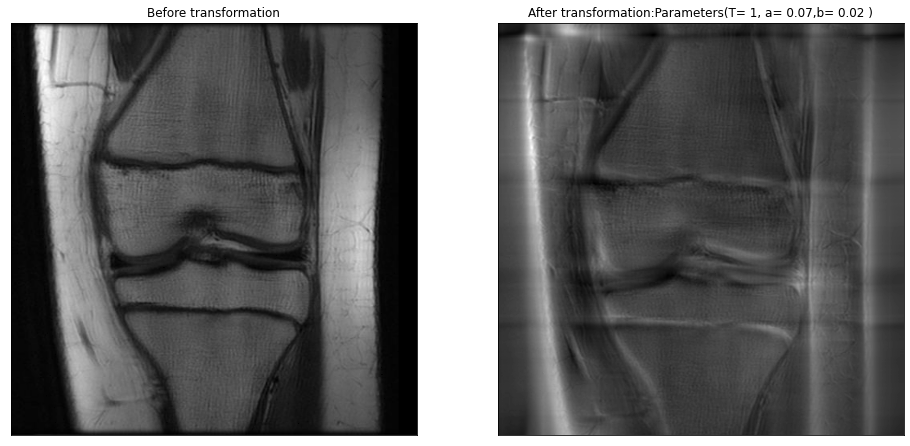

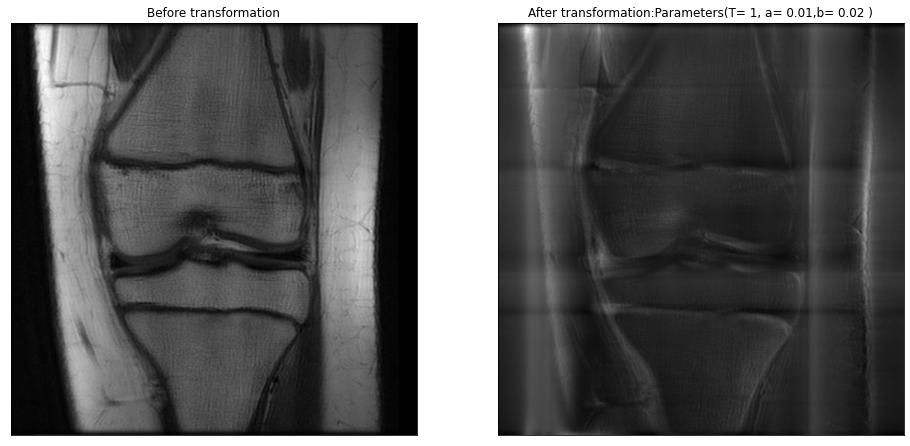

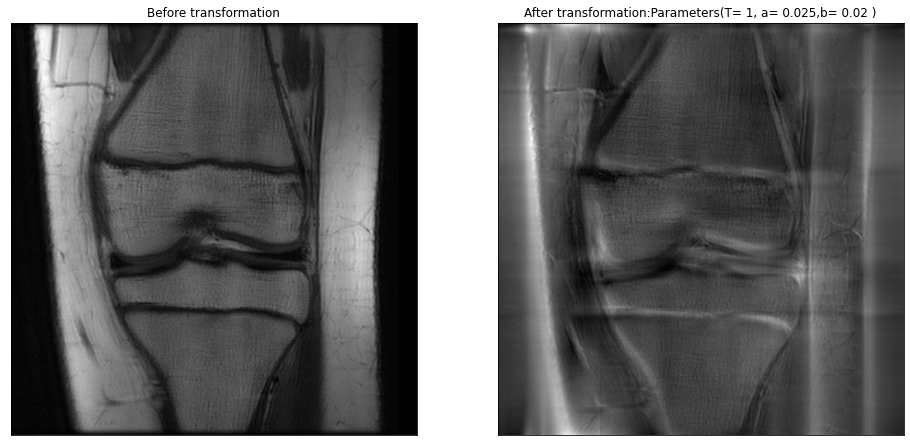

In [9]:
Gb = blur.generate_blurr_constant_b_and_T(T=1,a=[0.01,0.05,0.2,0.3,0.04,0.07,0.01,0.025],b=0.02)

In [10]:
Gb,x = blur.generate_blurr_combination_a_and_b(T=1,a=[0.01,0.05,0.02,0.03,0.04,0.07,0.01,0.025],b=[0.1,0.045,0.2,0.3,0.4,0.7,0.01,0.025,0.05])

NameError: name 'x' is not defined

In [ ]:
x,Gb

In [ ]:
len(Gb)